# Effects and Filters

In this experiment we are going to evaluate the effect of different effects and filters to the performance of the model.

In [1]:
from test_utils.imports import *

#### Load Baseline model

In [2]:
model_name = 'Baseline_Case'
model_path = '../MODELS/cross-validation/Baseline_Case/'
m = joblib.load(model_path + model_name + '.pkl')

## Effects
* Here we are going to evaluate the effect of different guitar effects like chorus, phaser, distortion and flanger on the model.

#### Load data

* Here we are going to use DI recordings plus SOX_Effects augmented recordings.

In [3]:
dataset_path = '../Databases/'
loader_name = 'Loaders/Guitar_effects_test.json'

loader = SEGMENTS_LOADER(dataset_path)
test_segments = loader.load_chromas_for_dataset(ex_2_id,loader_name, roll_to_c = False, segments = None)

with open(dataset_path+ loader_name) as af:
    test_audios = json.load(af)

# Filter third intervals
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Loaded 150 files.

--->>>The train segments  loading took 0.05 s to compute.
Test set has 14975 chromas.
maj -> Num chromas: 2150
min -> Num chromas: 1800
1 -> Num chromas: 9725
5 -> Num chromas: 1300
+3 -> Num chromas: 0
-3 -> Num chromas: 0


### Model performance

In [4]:
pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

#### Overall accuracy

In [5]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)
OM.accuracy()

Accuracy: 0.8627


0.8627

#### Accuracy by effect

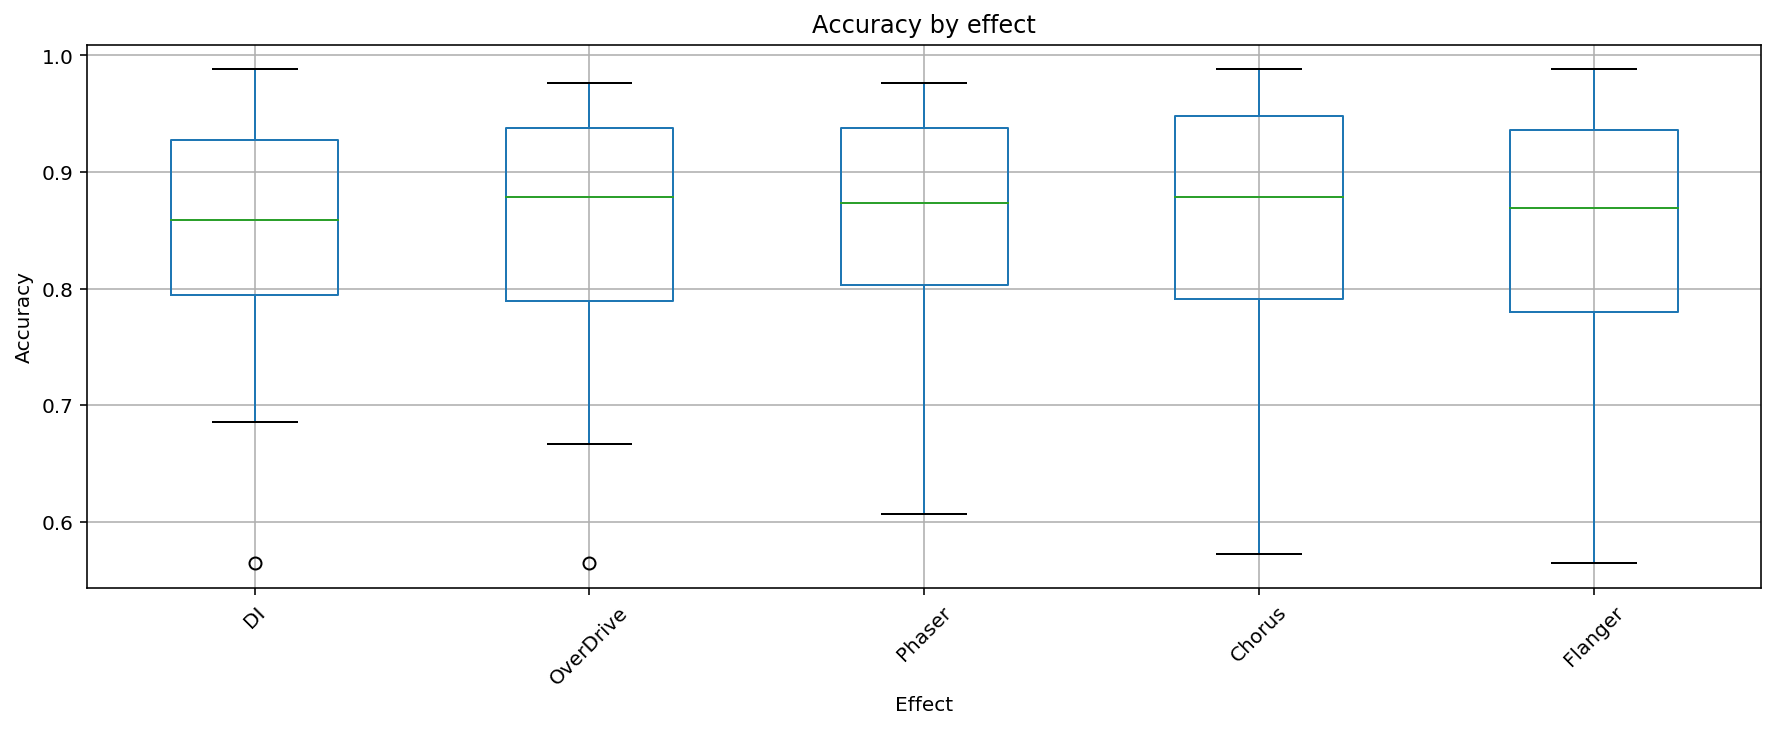

In [6]:
result = accuracy_by_source(test_segments,pred, test_audios)

cols = [c  for c in result.columns if (c != 'Song') and (c!='Performance')]

result.boxplot(column=cols,fontsize='medium',rot=45,figsize = (15,5))
plt.title('Accuracy by effect')
plt.xlabel('Effect')
plt.ylabel('Accuracy')
plt.show()

#### Accuracy by performance and effect

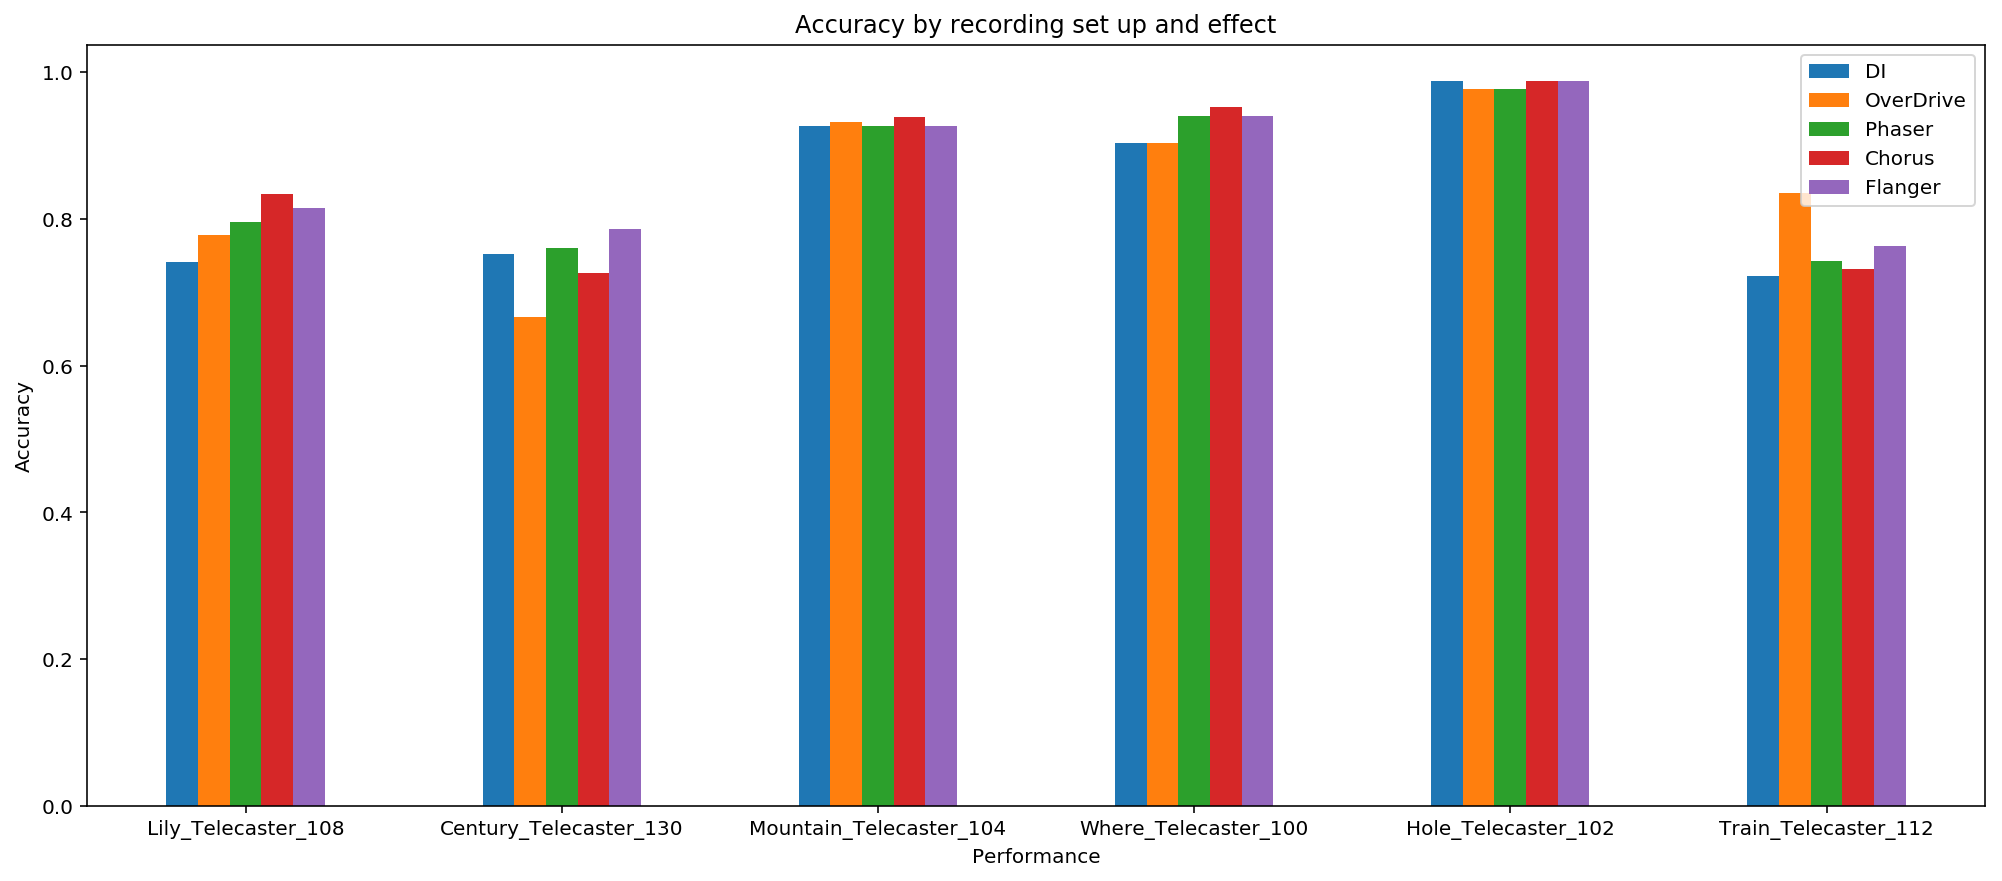

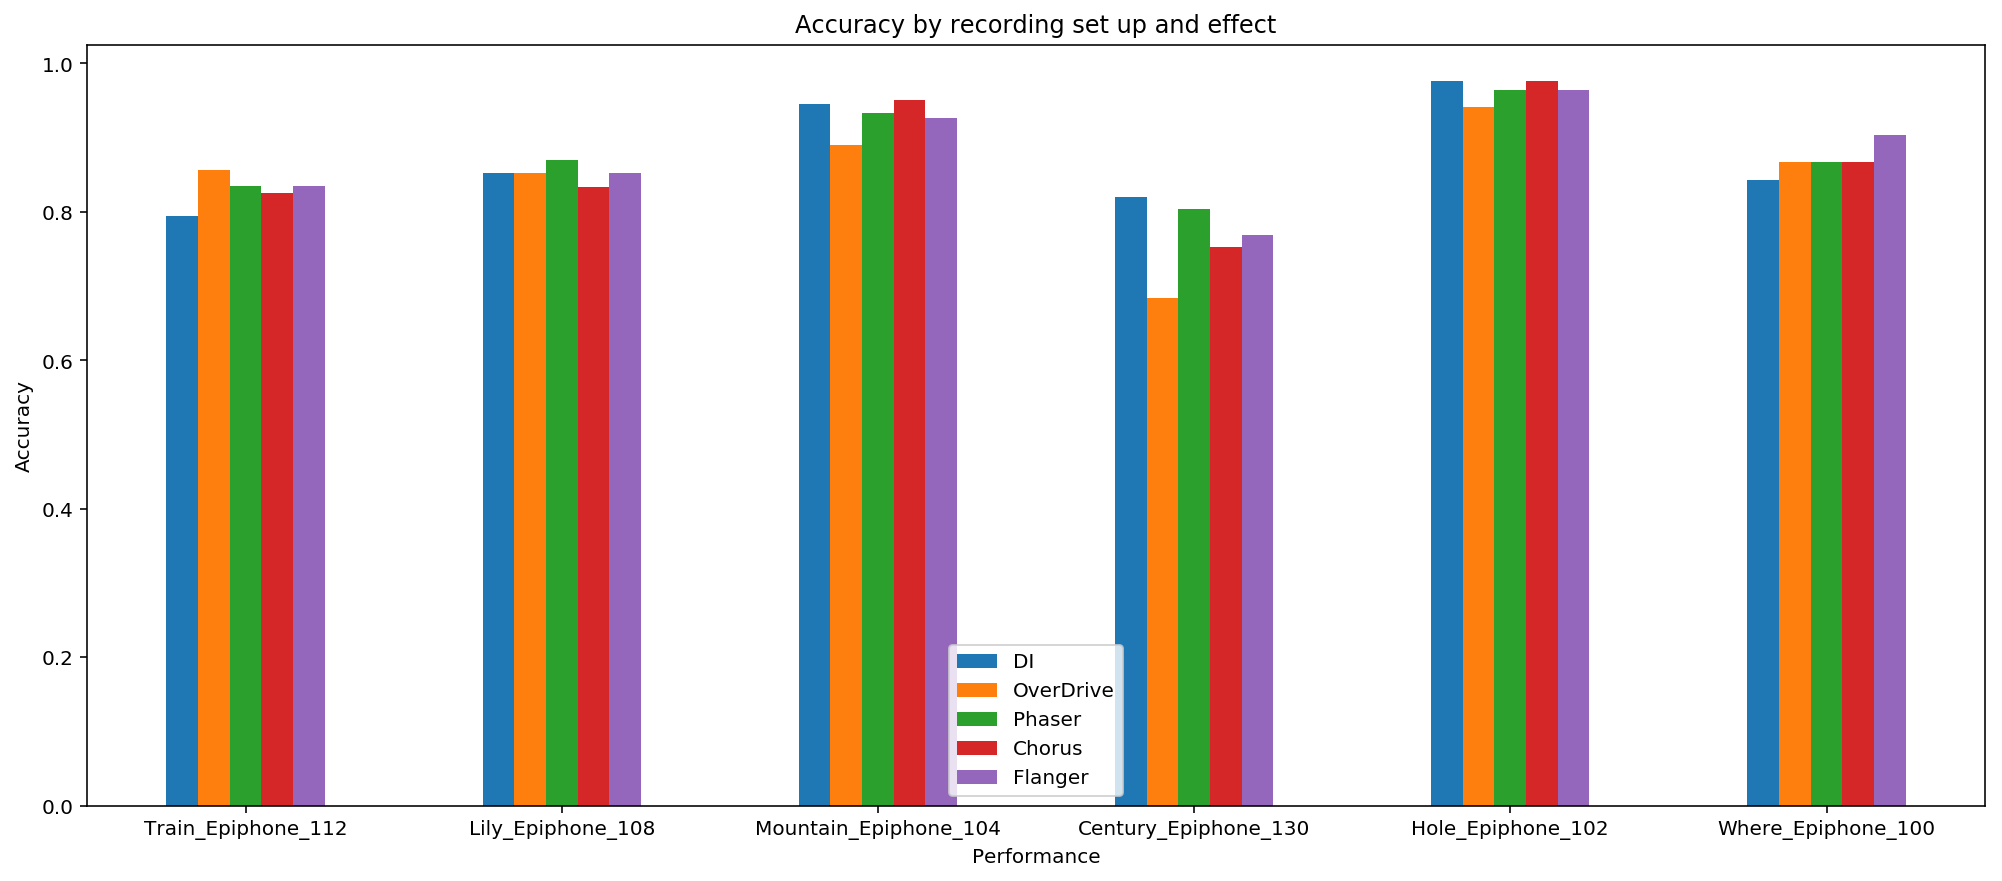

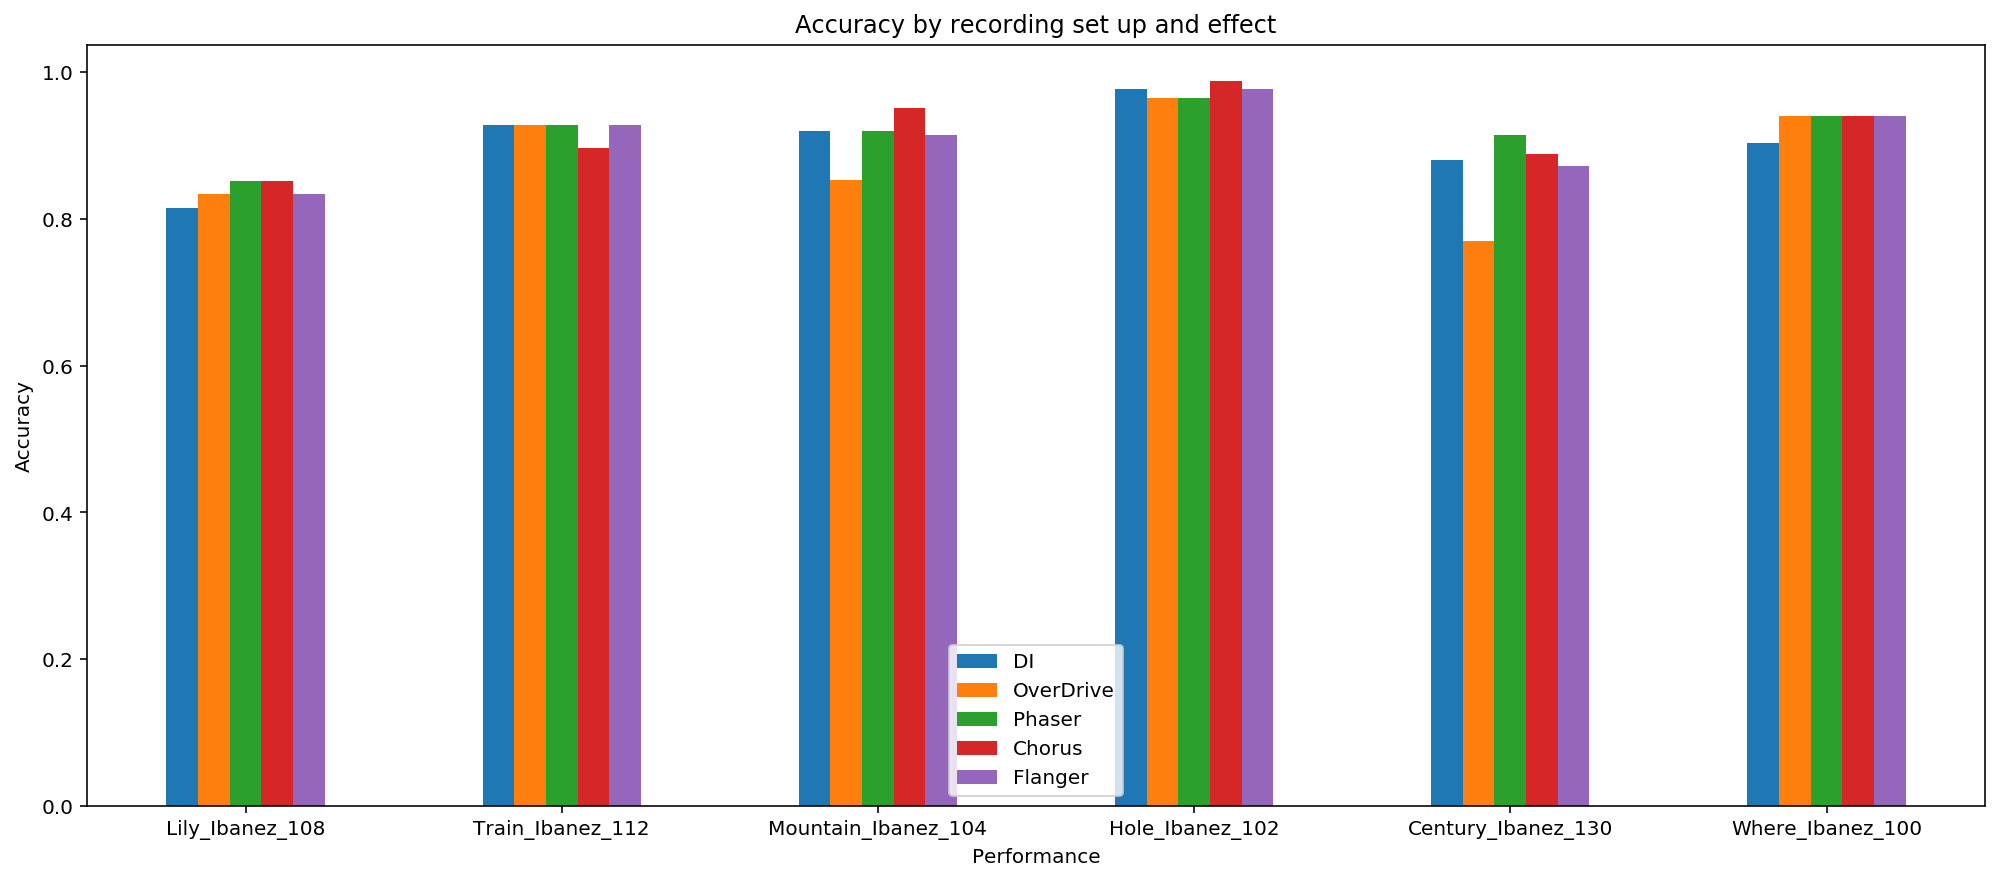

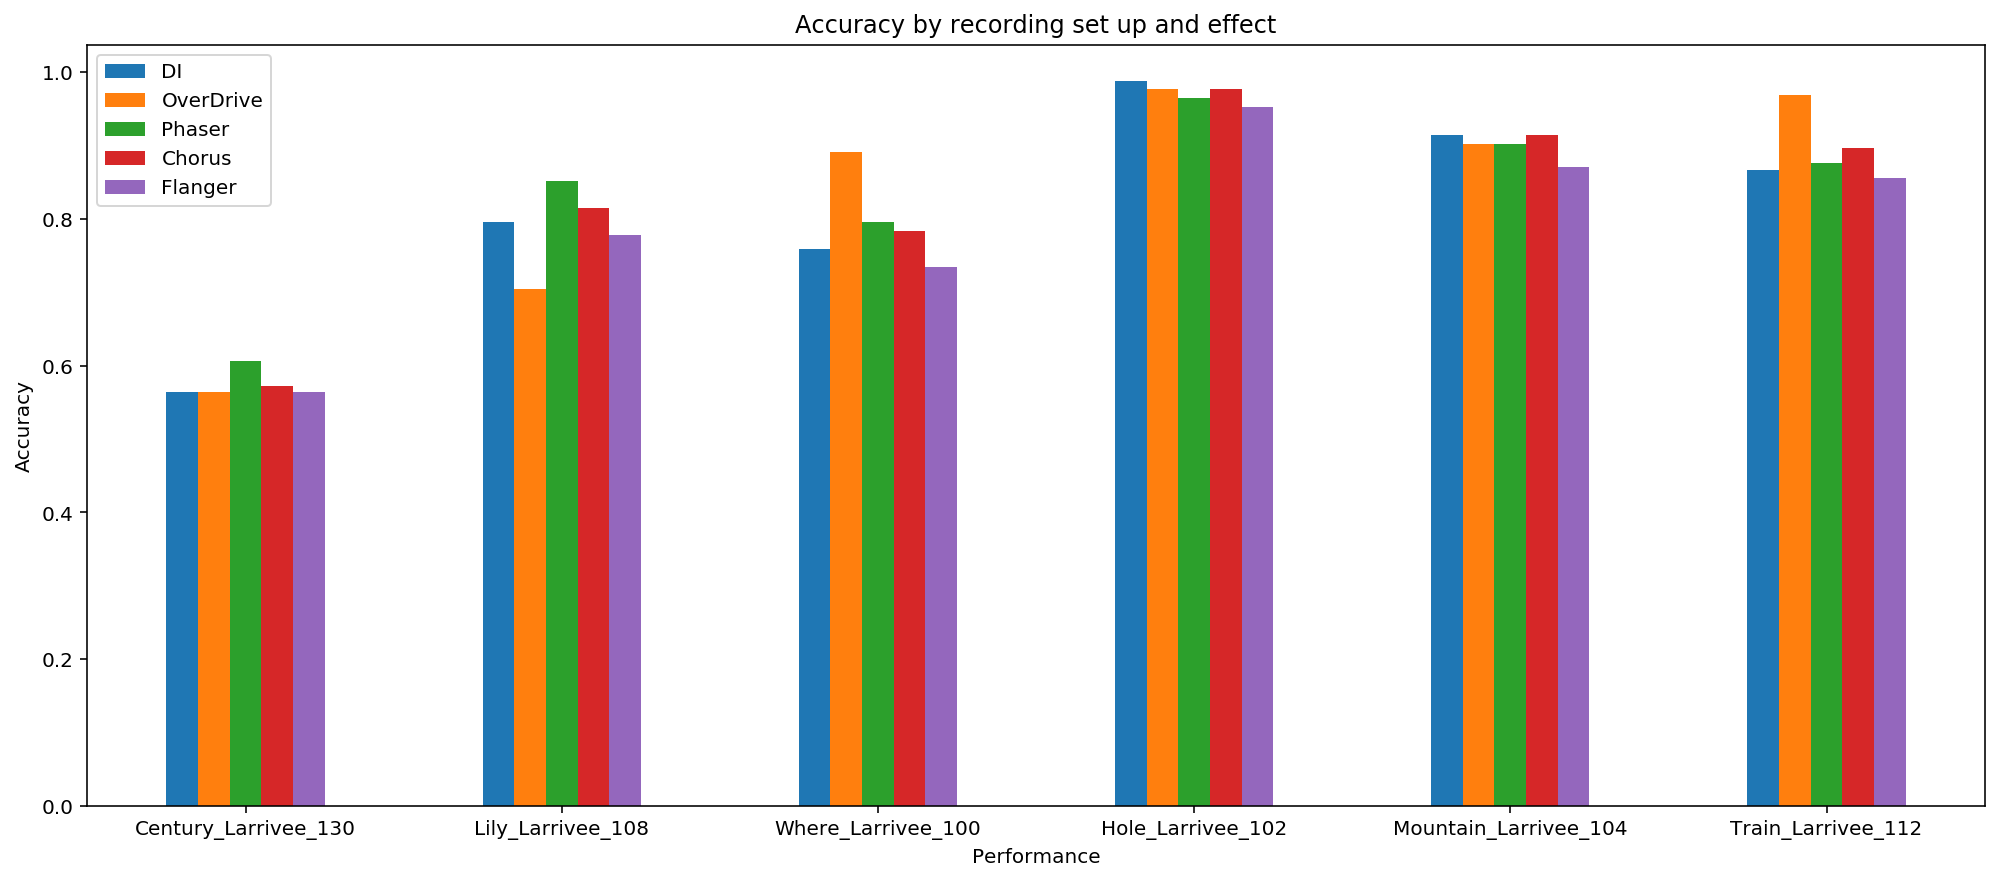

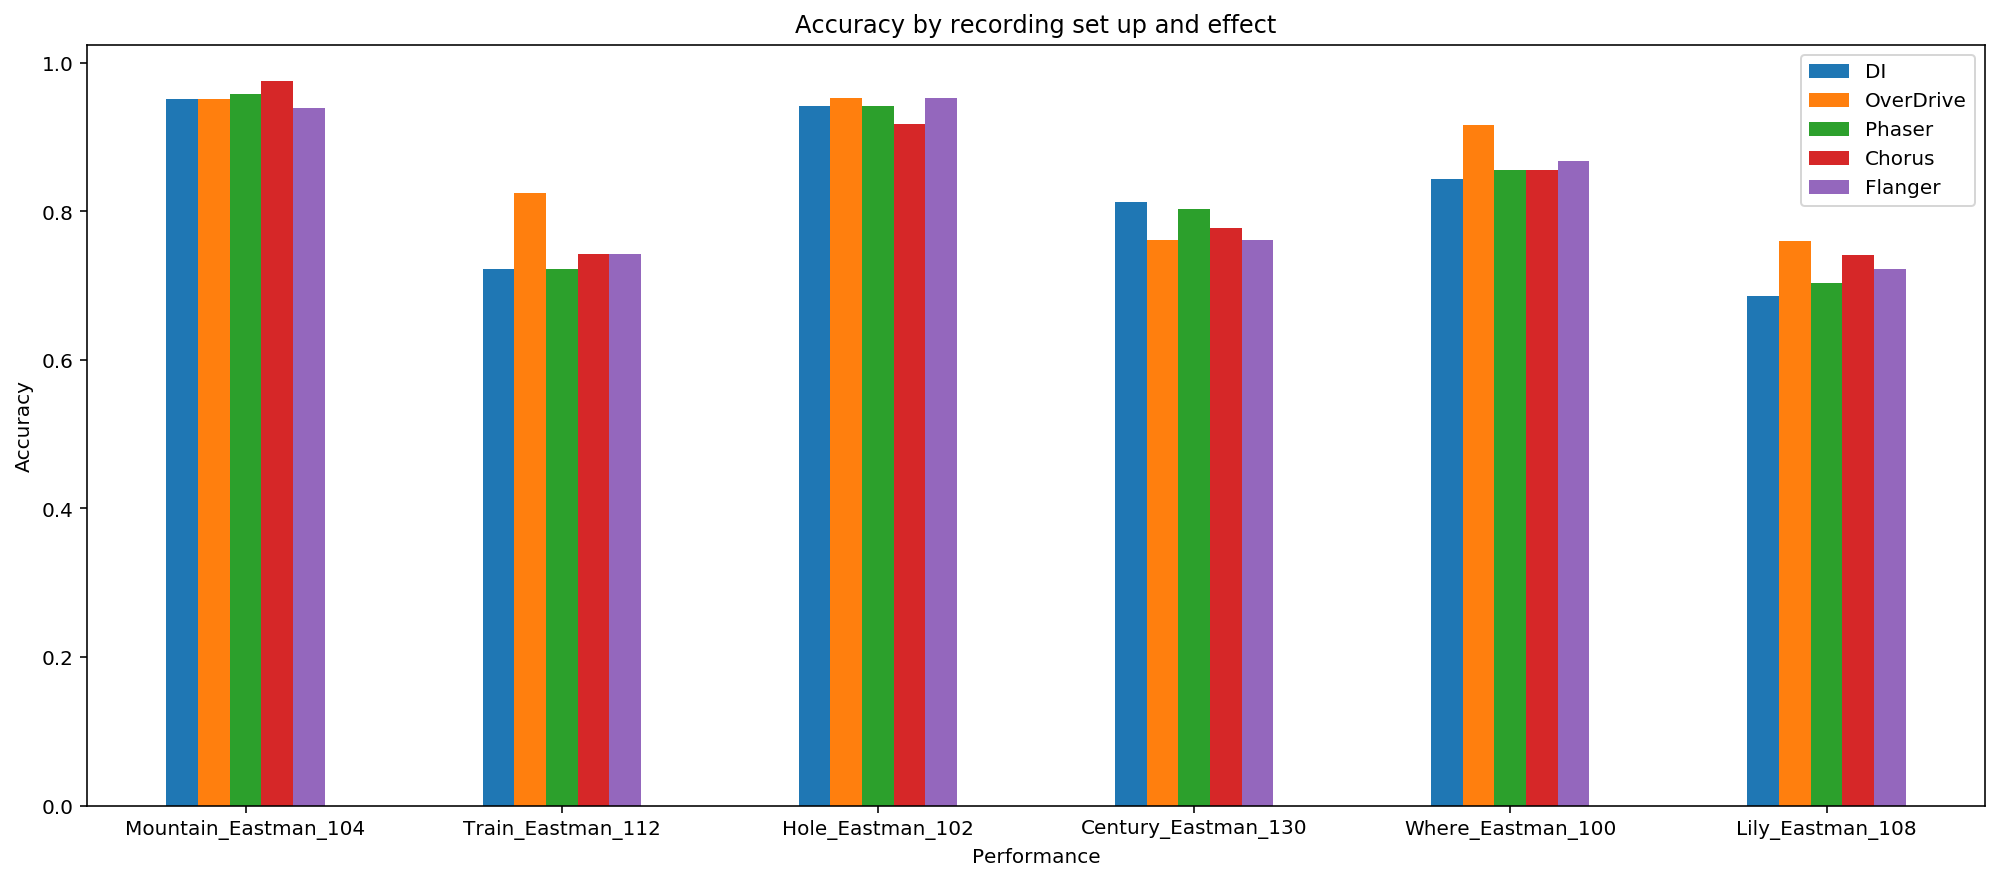

In [7]:
guitarres = ['Telecaster','Epiphone','Ibanez','Larrivee','Eastman']
for g in guitarres:
    performances = ['Century_'+g,'Lily_'+g,'Train_'+g,'Mountain_'+g,'Where_'+g,'Hole_'+g]
    result[result['Performance'].isin(performances)].plot.bar(fontsize='medium',rot=0,figsize = (17,7))

    plt.title('Accuracy by recording set up and effect')
    plt.xlabel('Performance')
    plt.ylabel('Accuracy')

    plt.show()

## Filters
* Here we are going to evaluate the effect of different filters on the model.

#### Load data

* Here we are going to use DI recordings plus SOX_Filters augmented recordings.

In [8]:
dataset_path = '../Databases/'
loader_name = 'Loaders/Guitar_filters_test.json'

loader = SEGMENTS_LOADER(dataset_path)
test_segments = loader.load_chromas_for_dataset(ex_2_id,loader_name, roll_to_c = False, segments = None)

with open(dataset_path+ loader_name) as af:
    test_audios = json.load(af)

# Filter third intervals
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Loaded 210 files.

--->>>The train segments  loading took 0.06 s to compute.
Test set has 20965 chromas.
maj -> Num chromas: 3010
min -> Num chromas: 2520
1 -> Num chromas: 13615
5 -> Num chromas: 1820
+3 -> Num chromas: 0
-3 -> Num chromas: 0


### Model Performance

In [9]:
pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

#### Overall accuracy

In [10]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)
OM.accuracy()

Accuracy: 0.8628


0.8628

#### Accuracy by filter

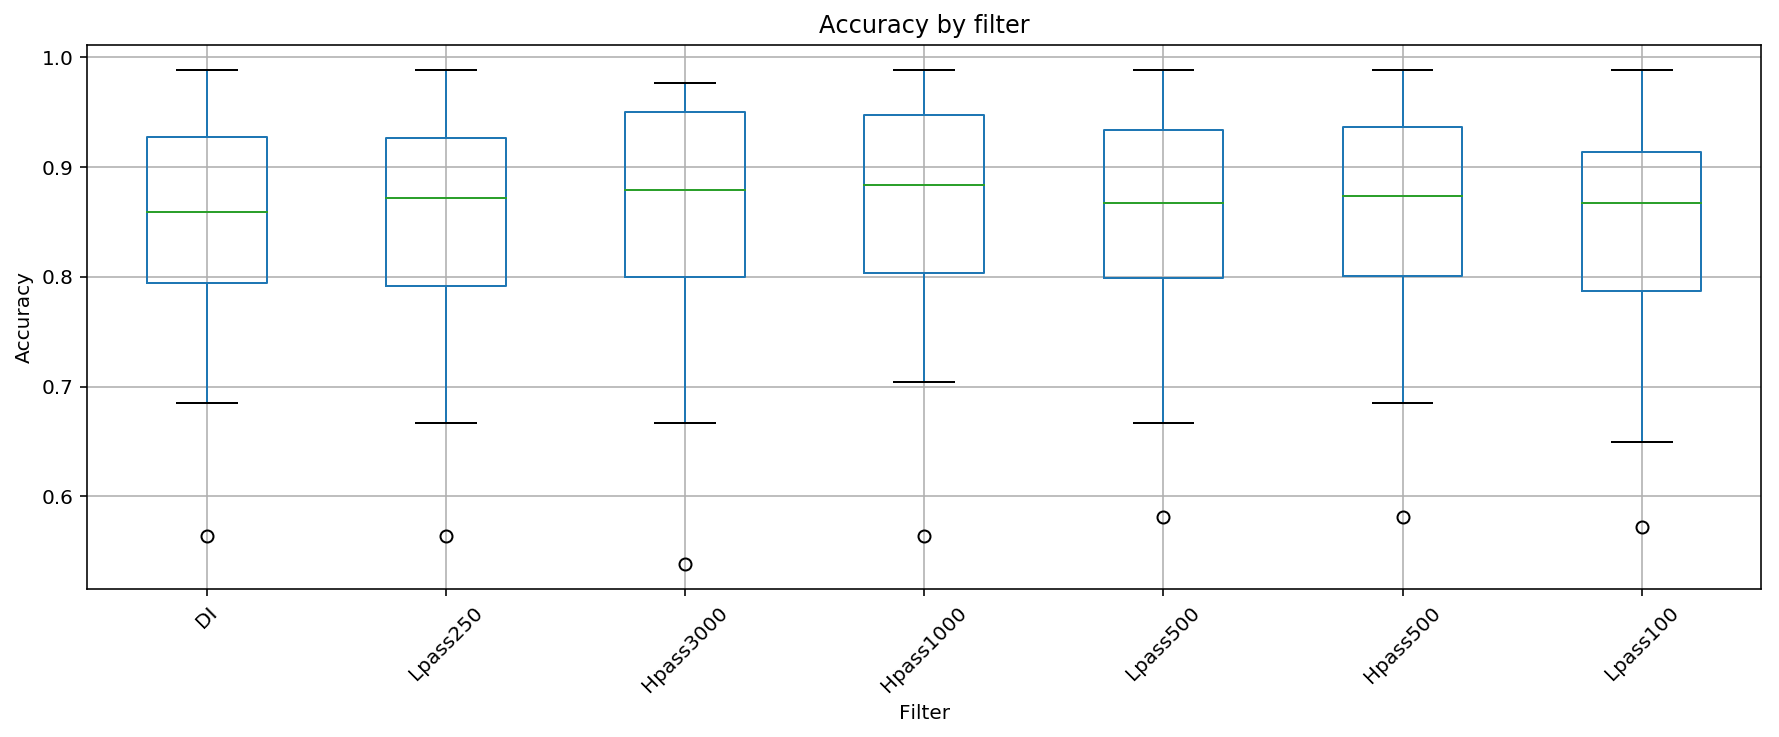

In [11]:
result = accuracy_by_source(test_segments,pred, test_audios)

cols = [c  for c in result.columns if (c != 'Song') and (c!='Performance')]

result.boxplot(column=cols,fontsize='medium',rot=45,figsize = (15,5))
plt.title('Accuracy by filter')
plt.xlabel('Filter')
plt.ylabel('Accuracy')
plt.show()

#### Accuracy by filter and performance

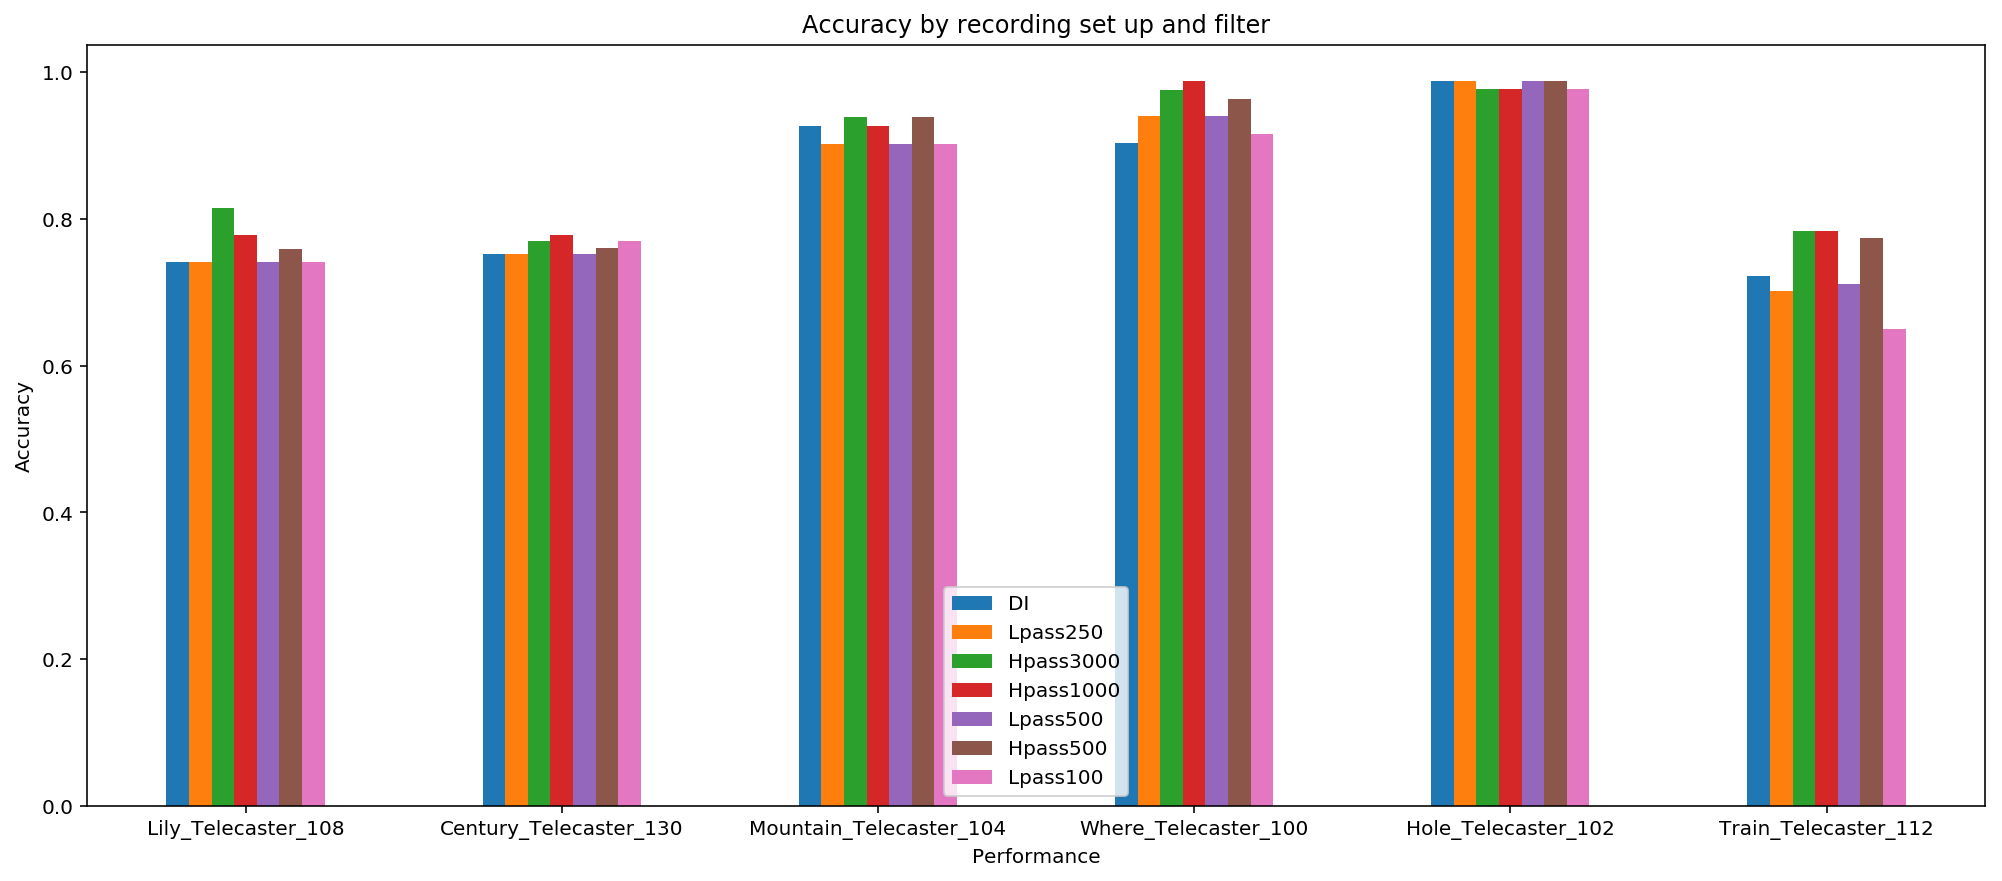

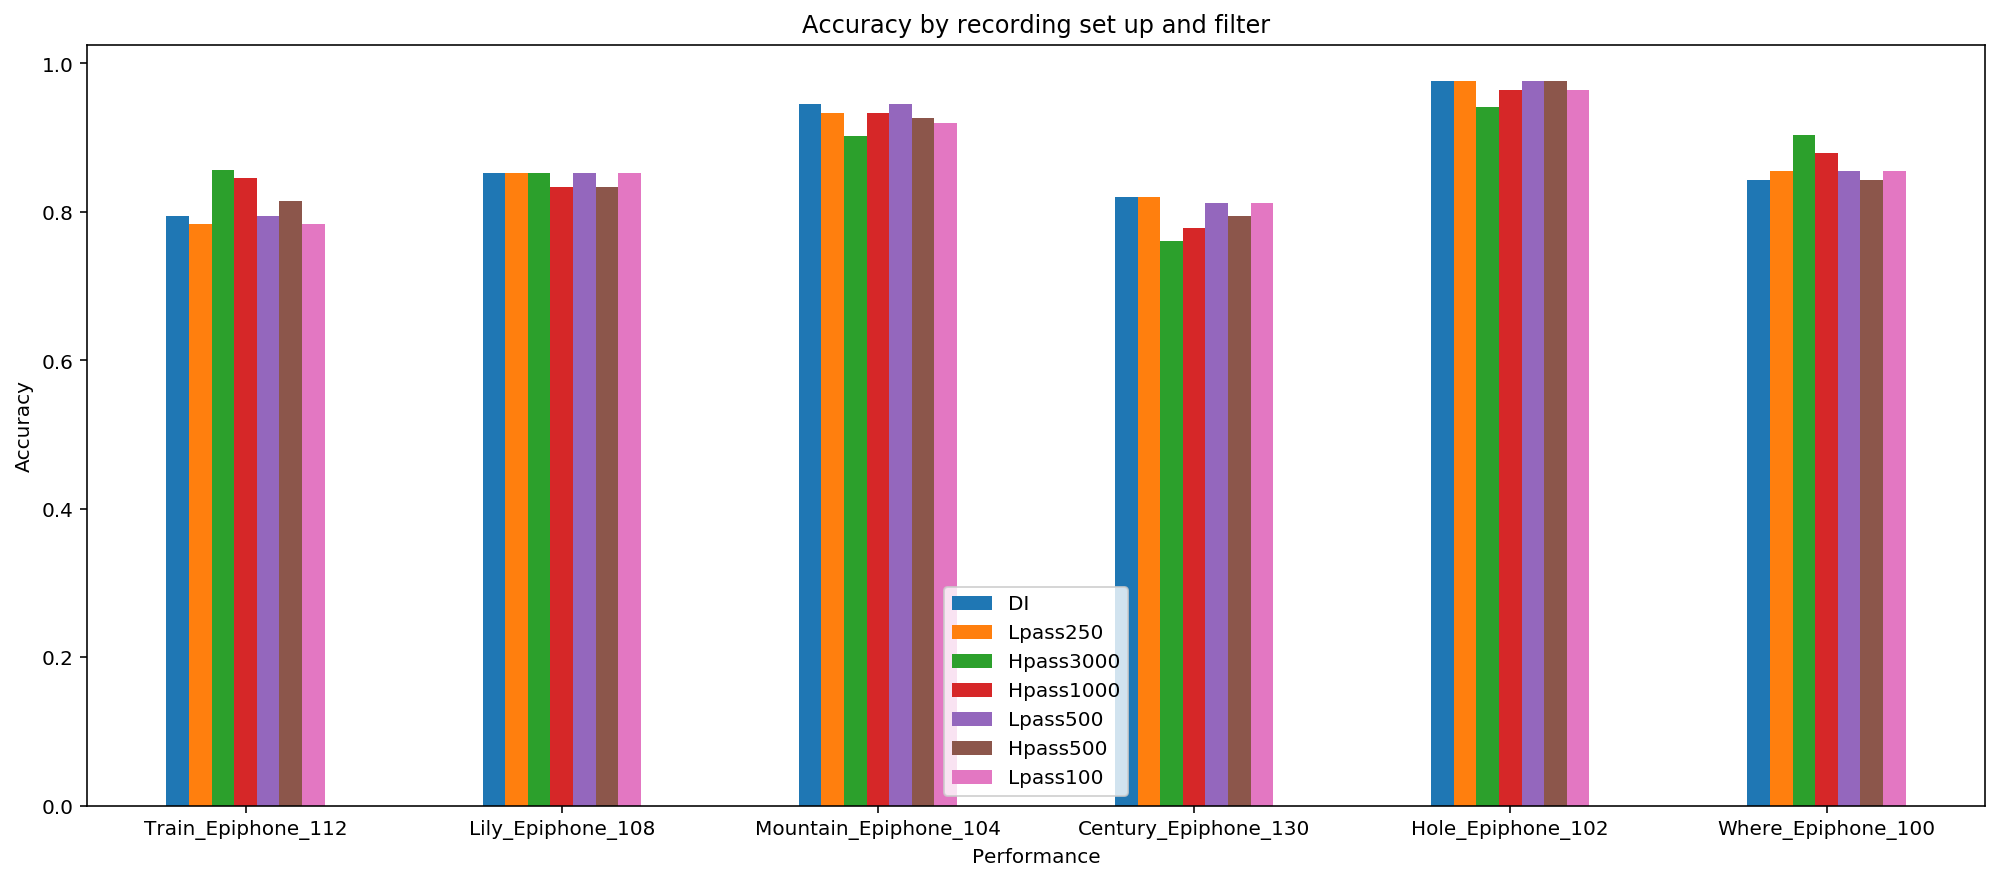

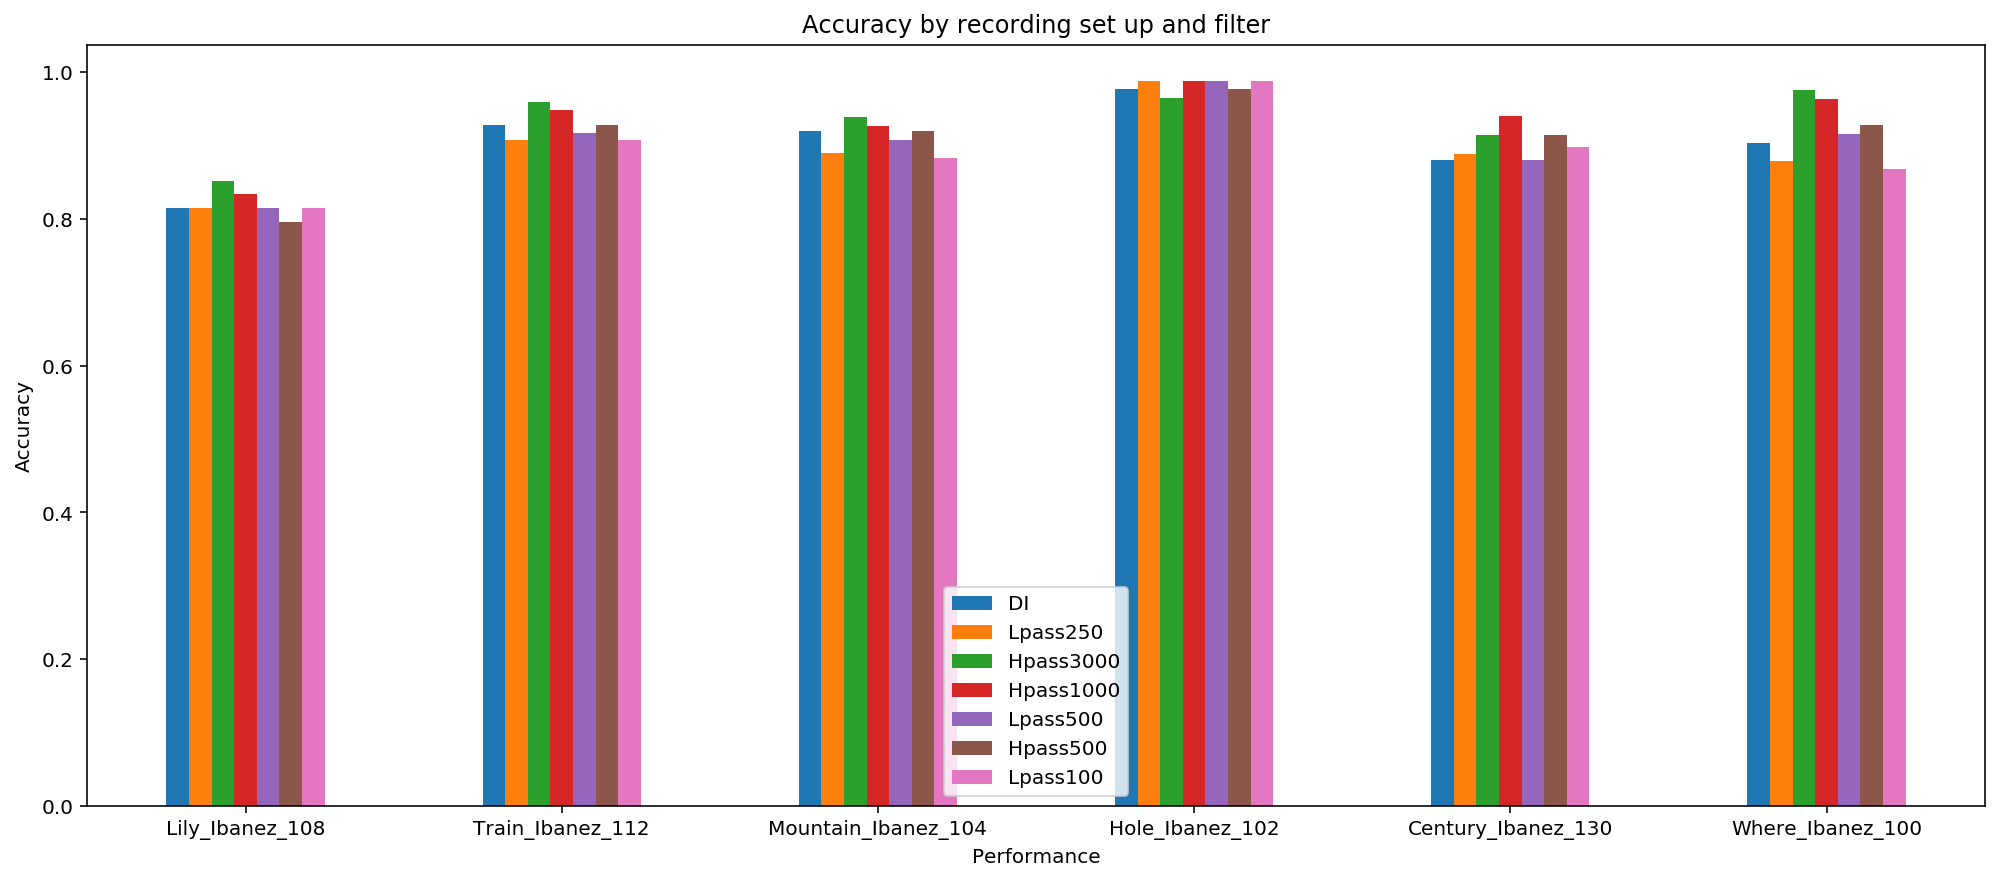

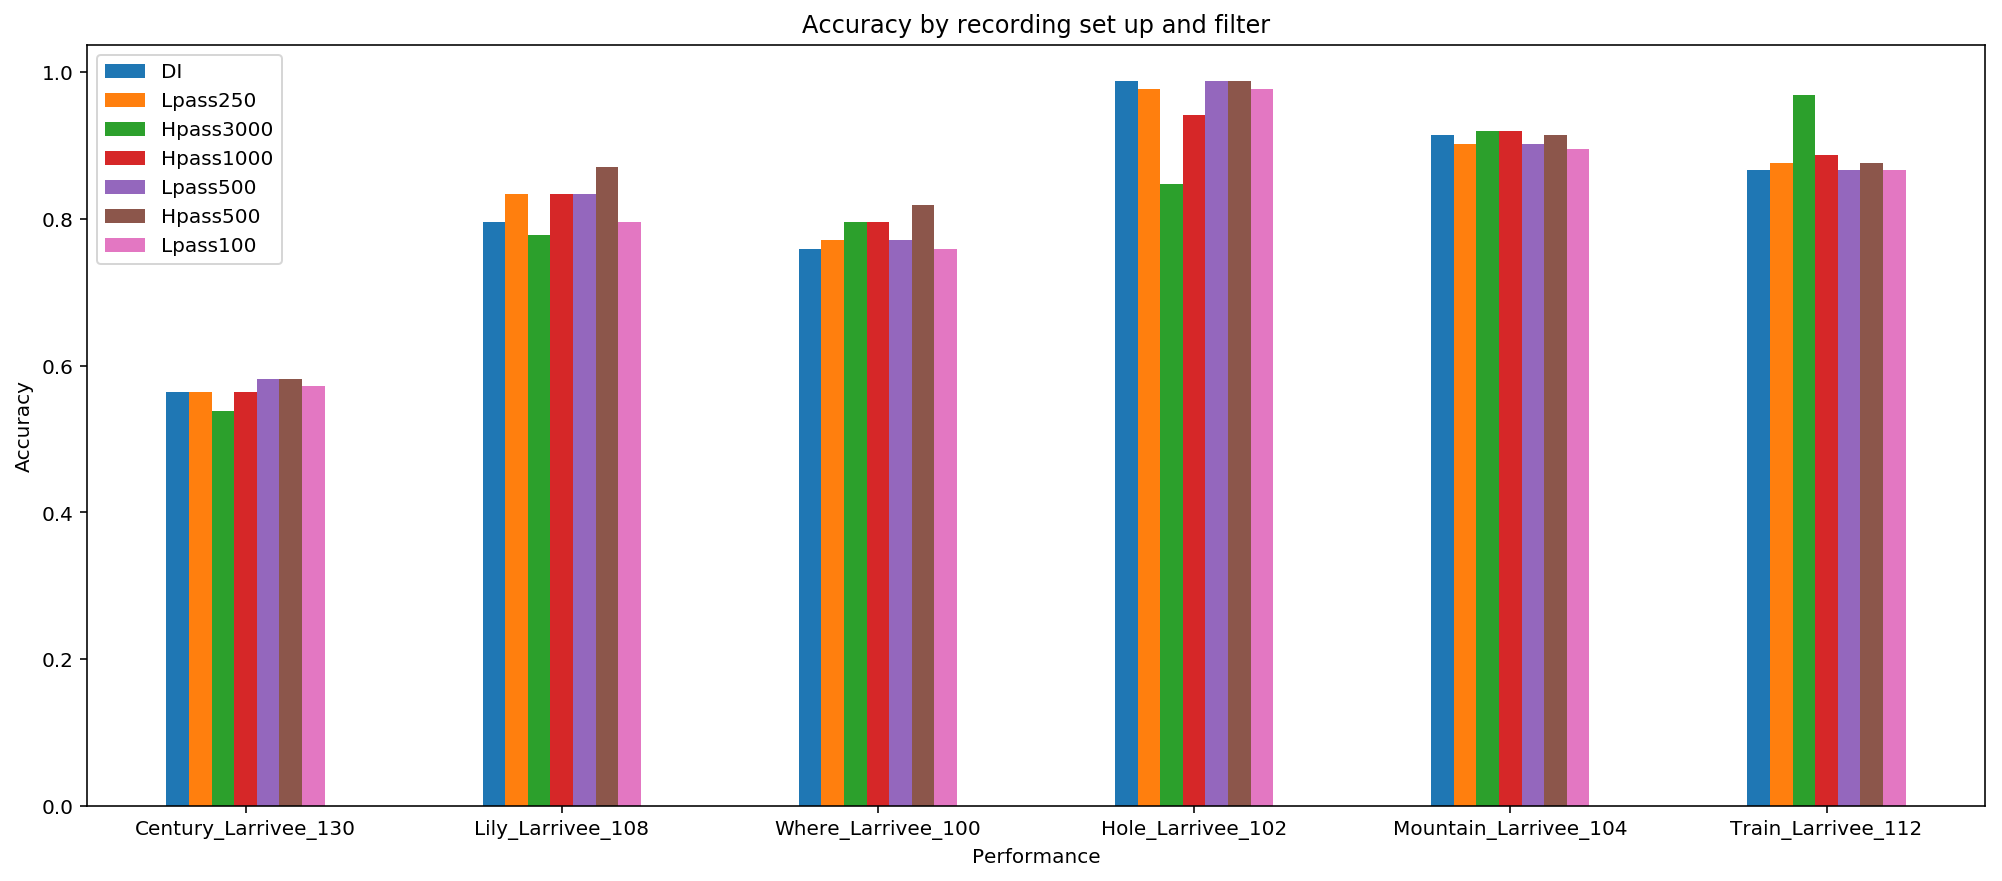

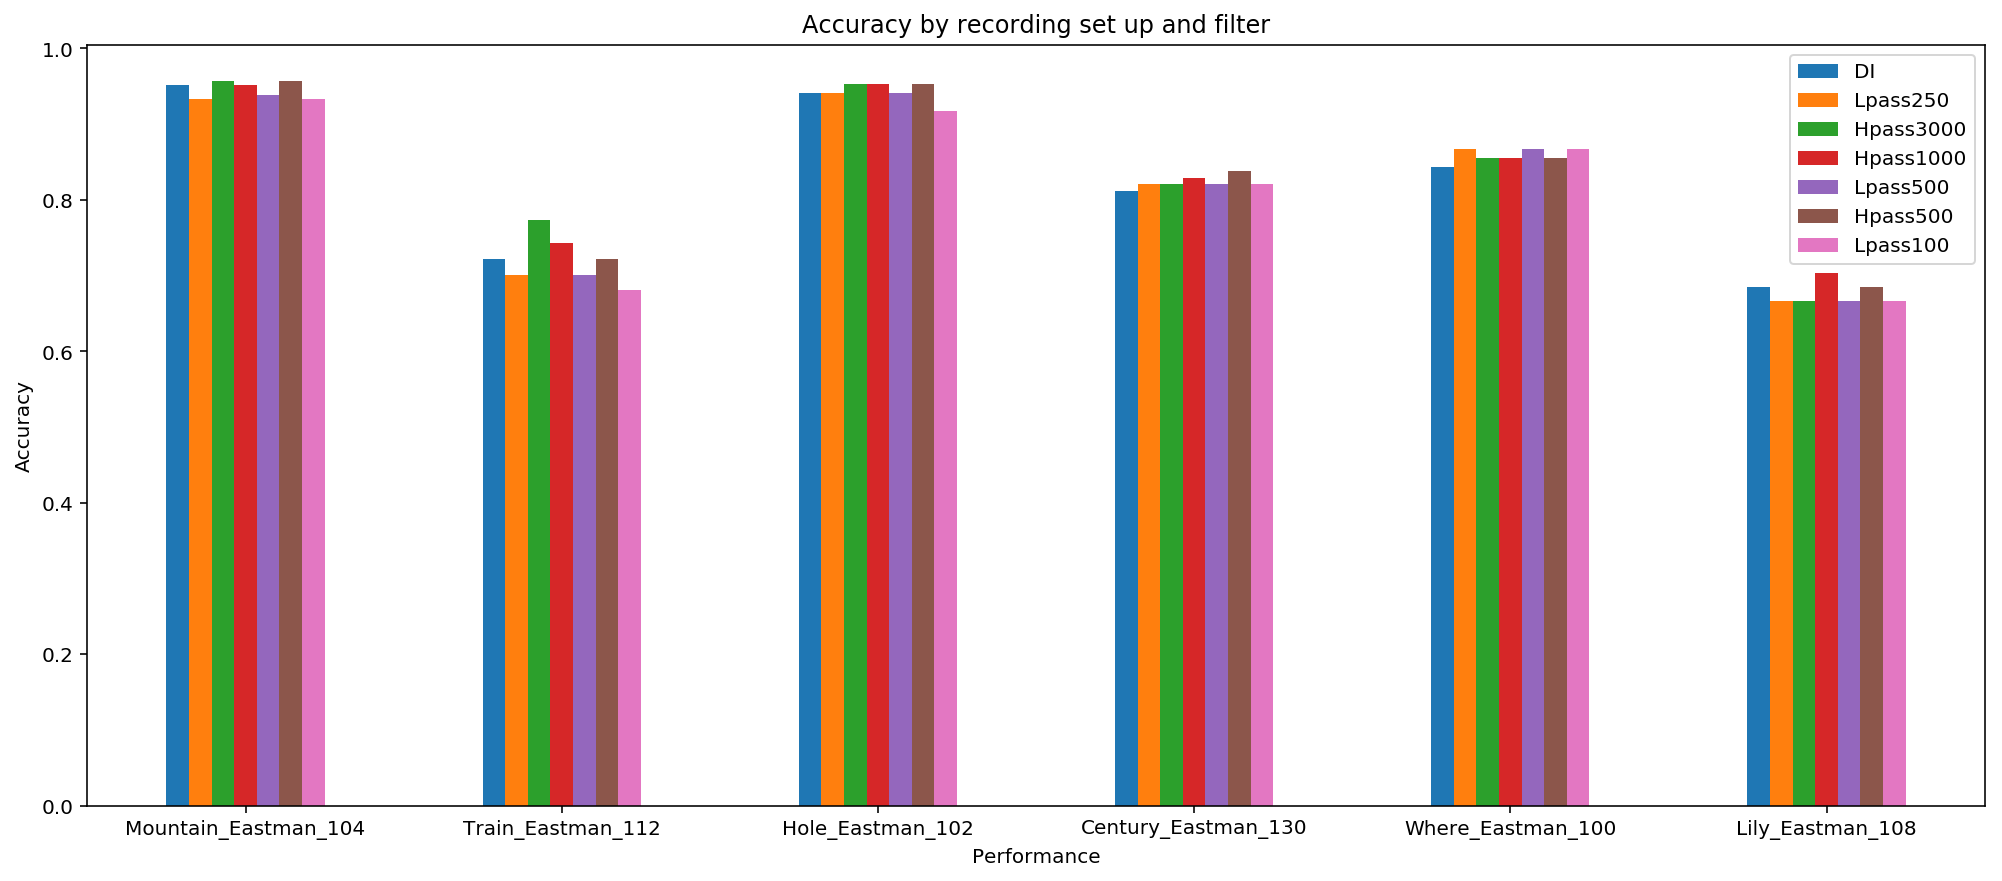

In [12]:
guitarres = ['Telecaster','Epiphone','Ibanez','Larrivee','Eastman']
for g in guitarres:
    performances = ['Century_'+g,'Lily_'+g,'Train_'+g,'Mountain_'+g,'Where_'+g,'Hole_'+g]
    result[result['Performance'].isin(performances)].plot.bar(fontsize='medium',rot=0,figsize = (17,7))

    plt.title('Accuracy by recording set up and filter')
    plt.xlabel('Performance')
    plt.ylabel('Accuracy')

    plt.show()